# Soil Data & climate regions


CSIRO DATA PORTAL:

https://data.csiro.au/search/keyword?q=soil&_st=keyword&_str=315&_si=4

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show

In [2]:
p_soil_data = gpd.read_file("/Users/brydejeffery/Desktop/GROUPPROJECT/Data/Soil/NUTRIENTS/PHOSPHORUS_nsaasr9nnd_02911a11es_geo___/point_colp.shp")
s_soil_data = gpd.read_file("/Users/brydejeffery/Desktop/GROUPPROJECT/Data/Soil/NUTRIENTS/sulphur_nsaasr9nnd_02911a06es_geo___/tb_ll_sum_extrs.shp")

print(p_soil_data.head())
print('\n\n', s_soil_data.head())

  STATE       NEARTOWN  COUNT  MINIMUM  MAXIMUM  AVERAGE  STDDEVIATI  \
0    WA      Kununurra     54      2.0      110    29.85       16.11   
1    NT      Katherine     32      7.2      130    37.43       29.47   
2    NT         Jabiru      4     11.0       22    15.50        5.07   
3    NT      Mataranka      1     40.0       40    40.00        0.00   
4    NT  Alice Springs      7      8.0      320    58.57      115.45   

   STDERROR  SKEWNESS    BESTLONG    BESTLAT                     geometry  
0      2.19      2.88  128.736092 -15.777730   POINT (128.73733 -15.7763)  
1      5.21      3.07  132.269908 -14.472201  POINT (132.27111 -14.47075)  
2      2.53      1.44  132.835954 -12.672441  POINT (132.83714 -12.67099)  
3      0.00      0.00  133.072067 -14.925015  POINT (133.07327 -14.92356)  
4     43.64      5.17  133.892861 -23.693099  POINT (133.89412 -23.69165)  


   STATE    NEARTOWN  COUNT  MINIMUM  MAXIMUM  AVERAGE  STDDEVIATI  STDERROR  \
0    WA   Kununurra     54   

In [3]:
print(p_soil_data.isnull().sum())

print('\n\n\n',p_soil_data[['MINIMUM', 'MAXIMUM', 'AVERAGE', 'STDDEVIATI']].describe())

STATE         3
NEARTOWN      0
COUNT         0
MINIMUM       0
MAXIMUM       0
AVERAGE       0
STDDEVIATI    0
STDERROR      0
SKEWNESS      0
BESTLONG      0
BESTLAT       0
geometry      0
dtype: int64



           MINIMUM      MAXIMUM     AVERAGE  STDDEVIATI
count  172.000000   172.000000  172.000000  172.000000
mean    11.403488   113.447674   31.810456   25.867247
std     17.393102   187.484121   41.621038   53.249402
min      1.000000     1.000000    1.000000    0.000000
25%      2.500000    25.000000   14.067500    3.577500
50%      5.500000    51.000000   21.470000   12.580000
75%     13.000000   126.250000   37.145000   28.307500
max    120.000000  1880.000000  333.500000  433.460000


In [4]:
print(s_soil_data.isnull().sum())

print('\n\n\n',s_soil_data[['MINIMUM', 'MAXIMUM', 'AVERAGE', 'STDDEVIATI']].describe())

STATE         551
NEARTOWN        0
COUNT           0
MINIMUM         0
MAXIMUM         0
AVERAGE         0
STDDEVIATI      0
STDERROR        0
SKEWNESS        2
BESTLONG        0
BESTLAT         0
geometry        0
dtype: int64



            MINIMUM       MAXIMUM      AVERAGE   STDDEVIATI
count  8924.000000   8924.000000  8924.000000  8924.000000
mean      7.554930     90.820932    17.813339    16.938232
std      37.021696    367.461580    55.835837    85.339783
min       0.000000      0.000000     0.030000     0.000000
25%       2.000000      6.000000     5.530000     0.000000
50%       3.990000     15.000000     8.600000     3.265000
75%       6.400000     55.000000    15.276325    11.385000
max    1880.000000  17600.000000  2213.030000  6217.330000


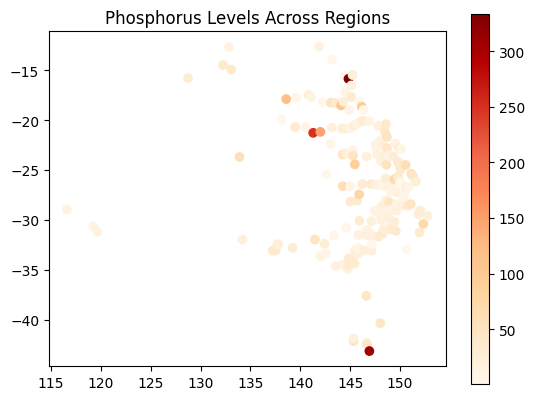

In [5]:
p_soil_data.plot(column='AVERAGE', cmap='OrRd', legend=True)
plt.title('Phosphorus Levels Across Regions')
plt.show()

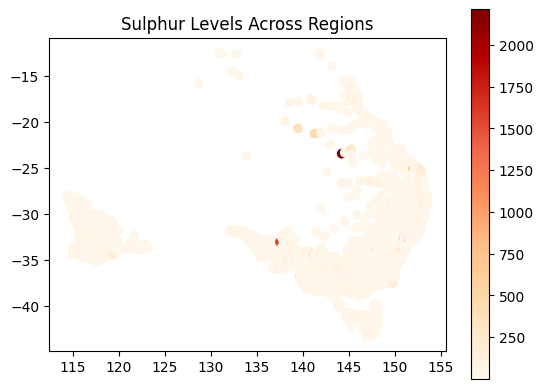

In [6]:
s_soil_data.plot(column='AVERAGE', cmap='OrRd', legend=True)
plt.title('Sulphur Levels Across Regions')
plt.show()

### RBG MAPS **

too big of a file, crashing computer... but would be good data. its surface and subsoil tiff files...

In [7]:
surface_tif_file = "/Users/brydejeffery/Desktop/GROUPPROJECT/Data/Soil/Soil_and_landscape_grid/Soil_and_Landscape_Grid_National_Soil_Attribute_Maps_-_Soil_Colour_(3__resolution)_-_Release_1-QEzDvqEq-/data/surface_RGB.tif"
subsoil_tif_file = "/Users/brydejeffery/Desktop/GROUPPROJECT/Data/Soil/Soil_and_landscape_grid/Soil_and_Landscape_Grid_National_Soil_Attribute_Maps_-_Soil_Colour_(3__resolution)_-_Release_1-QEzDvqEq-/data/subsoil_RGB.tif"

with rasterio.open(surface_tif_file) as soil_surface_dataset:
    print(soil_surface_dataset.meta)
    
with rasterio.open(subsoil_tif_file) as subsoil_dataset:
    print(subsoil_dataset.meta)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 49200, 'height': 40800, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008333333333467632, 0.0, 112.99958333340004,
       0.0, -0.0008333333333467631, -10.00041666646628)}
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 49200, 'height': 40800, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008333333333467632, 0.0, 112.99958333340004,
       0.0, -0.0008333333333467631, -10.00041666646628)}


In [8]:
## EXAMPLE -> maybe we could select an area based on  user input?

longitude = 132.0
latitude = -15.0

with rasterio.open(surface_tif_file) as soil_surface_dataset:
    point = soil_surface_dataset.index(longitude, latitude)  
    pixel_value = soil_surface_dataset.read(1)[point] # 1 = red 2= gree 3 = blue
    print(f"Pixel value at ({longitude}, {latitude}): {pixel_value}")

Pixel value at (132.0, -15.0): 99


In [11]:
with rasterio.open(surface_tif_file) as soil_surface_dataset:
    point = soil_surface_dataset.index(longitude, latitude)
    r, g, b = soil_surface_dataset.read(1)[point], soil_surface_dataset.read(2)[point], soil_surface_dataset.read(3)[point]
    print(f"Surface Soil RGB at ({longitude}, {latitude}): R={r}, G={g}, B={b}")

with rasterio.open(subsoil_tif_file) as subsoil_dataset:
    point = subsoil_dataset.index(longitude, latitude)
    r, g, b = subsoil_dataset.read(1)[point], subsoil_dataset.read(2)[point], subsoil_dataset.read(3)[point]
    print(f"Subsoil RGB at ({longitude}, {latitude}): R={r}, G={g}, B={b}")

Surface Soil RGB at (132.0, -15.0): R=99, G=66, B=46
Subsoil RGB at (132.0, -15.0): R=112, G=59, B=37


In [10]:
# show specific band ->  multi-band file like RGB

# with rasterio.open(surface_tif_file) as soil_surface_dataset:
#     fig, ax = plt.subplots(figsize=(10, 10))
#     show(soil_surface_dataset.read(1), ax=ax)  # Show band 1 aka red
#     plt.show()


# Climate Regions

http://www.bom.gov.au/jsp/ncc/climate_averages/climate-classifications/index.jsp?maptype=kpn#maps

In [16]:
import rasterio
import numpy as np

file_path = '/Users/brydejeffery/Desktop/GROUPPROJECT/Data/Soil/classification/kpnall.txt'

# kpnall file is raster (ASCII grid)
with rasterio.open(file_path) as src:

    data = src.read(1).astype(float)  # Convert the data to float to allow for NaN replacement 
    
    # Replace NODATA values with NaN
    nodata = src.nodata
    data[data == nodata] = np.nan
    
    # user given coordinates? e.g near kakadu (NT)
    longitude = 132.0
    latitude = -15.0

    try:
    
        row, col = src.index(longitude, latitude)
        
        row = int(row)
        col = int(col)
        
        # Extract the value at that location
        pixel_value = data[row, col]

        # Check if the pixel value is valid or NaN
        if np.isnan(pixel_value):
            print(f"No data available at ({longitude}, {latitude})")
        else:
            print(f"Köppen classification at ({longitude}, {latitude}): {pixel_value}")

    except ValueError:
        print(f"Coordinates ({longitude}, {latitude}) are out of bounds in the raster file.")


Köppen classification at (132.0, -15.0): 35.0


In [17]:
with rasterio.open(file_path) as src:
   
    data = src.read(1).astype(float)  
    
    nodata = src.nodata
    data[data == nodata] = np.nan

    longitude = 147.3272
    latitude = -42.8821

    try:
        row, col = src.index(longitude, latitude)
        
        row = int(row)
        col = int(col)
        
        pixel_value = data[row, col]

        if np.isnan(pixel_value):
            print(f"No data available at ({longitude}, {latitude})")
        else:
            print(f"Köppen classification at ({longitude}, {latitude}): {pixel_value}")

    except ValueError:
        print(f"Location Coordinates ({longitude}, {latitude}) out of bounds.")


Köppen classification at (147.3272, -42.8821): 3.0


In [ ]:
koppen_classification = {
    42: "Equatorial rainforest (monsoonal)",
    41: "Equatorial savanna",
    37: "Tropical rainforest (persistently wet)",
    36: "Tropical rainforest (monsoonal)",
    35: "Tropical savanna",
    34: "Subtropical (no dry season)",
    33: "Subtropical (distinctly dry summer)",
    32: "Subtropical (distinctly dry winter)",
    31: "Subtropical (moderately dry winter)",
    24: "Desert (hot, persistently dry)",
    23: "Desert (hot, summer drought)",
    22: "Desert (hot, winter drought)",
    21: "Desert (warm, persistently dry)",
    15: "Grassland (hot, persistently dry)",
    14: "Grassland (hot, summer drought)",
    13: "Grassland (hot, winter drought)",
    12: "Grassland (warm, persistently dry)",
    11: "Grassland (warm, summer drought)",
    9: "Temperate (no dry season, hot summer)",
    8: "Temperate (moderately dry winter, hot summer)",
    7: "Temperate (distinctly dry and hot summer)",
    6: "Temperate (no dry season, warm summer)",
    5: "Temperate (moderately dry winter, warm summer)",
    4: "Temperate (distinctly dry and warm summer)",
    3: "Temperate (no dry season, mild summer)",
    2: "Temperate (distinctly dry and mild summer)",
    1: "Temperate (no dry season, cool summer)"
}